# Центральная предельная теорема

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

В качестве примера я выбрал распределение хи-квадрат $\chi^2_k$, имеющее натуральный параметр $k$, который называется числом степеней свободы. В данном примере $k$ = 7.

In [48]:
k = 7

Генерируем выборку $объема = 1000$, строим ее гистограмму и теоретическую плотность распределения.

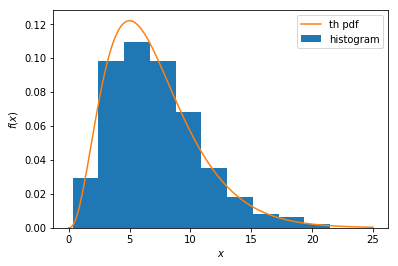

In [49]:
rv = sts.chi2(k) 
sample = rv.rvs(1000)
x = np.linspace(0,25,1000)
pdf = rv.pdf(x)
plt.hist(sample, normed=True, label='histogram')
plt.plot(x, pdf, label='th pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Для разных объемов выборок (1,3,5,10,50,100) генерируем по 1000 выборок и строим гистограммы их выборочных средних. Затем задаем параметры для вычисления нормального распределения и накладываем его на гистограмму.

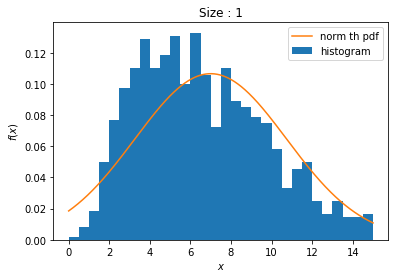

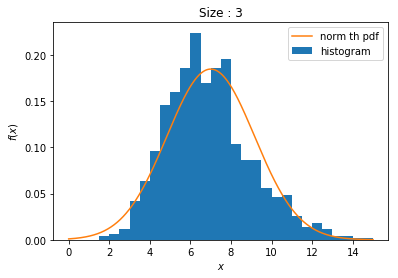

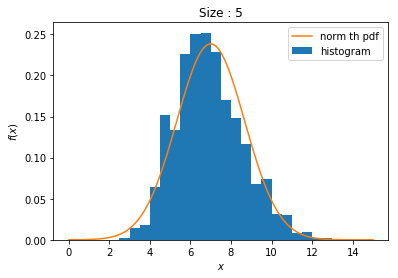

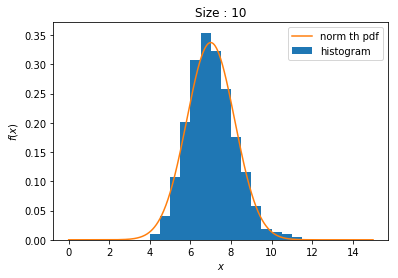

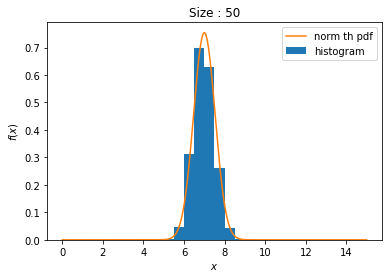

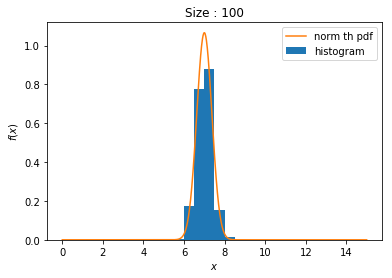

In [73]:
for n in [1, 3, 5, 10, 50, 100]:
    # берем среднее и рисуем на графике гистограмму
    sample_means = []
    for rvn in range(1000):
        sample_means.append(rv.rvs(n).mean())
    plt.hist(sample_means, 30, normed=True, range=[0, 15], label='histogram')
    # задаем параметры для вычисления нормального распределения и рисуем его на графике
    norm_rv = sts.norm(7, np.sqrt(2.*7./n))
    x = np.linspace(0, 15, 1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='norm th pdf')
    plt.legend()
    plt.title("Size : %d" % n)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

### Вывод
С увелечением размера выборки среднеквадратичное отклонение падает, а распределение выборочных средних значений сходится к 7, следовательно, точность апроксимации растет. При этом, при n > 50 разница становится все менее заметной.